<h1>Generation of data</h1>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [0]:
mean = [0.5, 0.5]
cov = [[0.1, 0], [0, 0.1]]
x1, y1 = np.random.multivariate_normal(mean, cov, 100).T

In [3]:
first_sample = []
for i in range(len(x1)):
  new_list = [x1[i],y1[i],1]
  first_sample.append(new_list)
print(len(first_sample))
print(len(first_sample[0]))    

100
3


In [4]:
first_sample_X = []
for i in range(len(x1)):
  new_list = [x1[i],y1[i]]
  first_sample_X.append(new_list)
print(len(first_sample_X))
print(len(first_sample_X[0])) 

100
2


In [0]:
mean = [-0.5, -0.5]
cov = [[0.1, 0], [0, 0.1]]
x2, y2 = np.random.multivariate_normal(mean, cov, 100).T

In [6]:
second_sample = []
for i in range(len(x2)):
  new_list = [x2[i],y2[i],0]
  second_sample.append(new_list)
print(len(second_sample))
print(len(second_sample[0]))  

100
3


In [7]:
second_sample_X = []
for i in range(len(x2)):
  new_list = [x2[i],y2[i]]
  second_sample_X.append(new_list)
print(len(second_sample_X))
print(len(second_sample_X[0])) 

100
2


In [0]:
X_full = []
y_full = []
for i in range(100):
  first = first_sample[i]
  first_y = first[-1]
  second = second_sample[i]
  second_y = second[-1]
  X_full.append(first)
  y_full.append(first_y)
  X_full.append(second)
  y_full.append(second_y) 
X_full = np.asarray(X_full)
y_full = np.asarray(y_full)

In [9]:
print(X_full.shape)
print(y_full.shape)

(200, 3)
(200,)


Input matrix X

In [0]:
X = []
for i in range(100):
  first = first_sample_X[i]
  second = second_sample_X[i]
  X.append(first)
  X.append(second) 
X = np.asarray(X)

Output matrix y

In [11]:
y = []
for i in range(200):
  y.append(y_full[i])
y = np.asarray(y)
print(y.shape)

(200,)


Plotting of generated data points

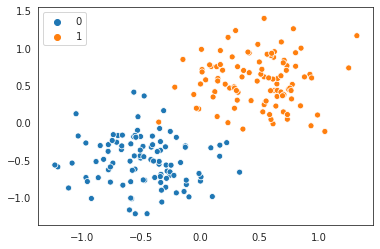

In [12]:
import seaborn as sns
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

<h1>Gradient Descent</h1>

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Loss_function(X,y,w):
  z = np.dot(X,w)
  h = sigmoid(z) 
  loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
  return loss

def Loss_gradient(X,y,w):
  z = np.dot(X,w)
  h = sigmoid(z) 
  gradient = np.dot(X.T, (h - y))
  return gradient

def gradient_descent(init, steps, grad):
  xs = [init]
  for step in steps:
    xs.append(xs[-1] - step * grad(X,y,xs[-1])) 
  return xs

def predict(X,w):
  return np.round(sigmoid(X @ w))

In [14]:
w0 = np.random.normal(0,1,2)
import time
t0 = time.time()
ws = gradient_descent(w0,[0.01]*2500,Loss_gradient)
run_time = time.time() - t0
print(f'Total run time of gradient descent = {run_time}')

Total run time of gradient descent = 0.0442357063293457


In [15]:
y_pred = predict(X, ws[-1])
RSS_manual = np.mean((y_pred-y)**2)/(np.std(y)**2)
Rsq_manual = 1-RSS_manual
print(f'Rsq value = {Rsq_manual}')

Rsq value = 0.98


Generating loss values at every iteration

In [0]:
all_losses = []
for w in ws:
  loss = Loss_function(X,y,w)
  all_losses.append(loss)

In [17]:
for i in range(len(all_losses)):
  if i%500==0:
    print(f'Loss at interation {i} = {all_losses[i]}')

Loss at interation 0 = 0.7596554868403856
Loss at interation 500 = 0.033334104210441674
Loss at interation 1000 = 0.030666553292922494
Loss at interation 1500 = 0.029784494171249176
Loss at interation 2000 = 0.029381430956705996
Loss at interation 2500 = 0.029168876674928176


Plot of loss values v/s interations

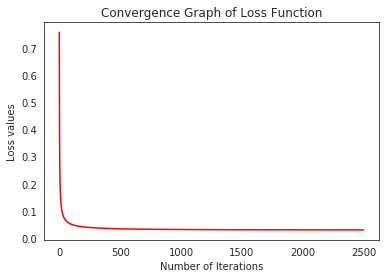

In [18]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(all_losses)), all_losses, 'r')
plt.title("Convergence Graph of Loss Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss values")
plt.show()

Classification output using gradient descent

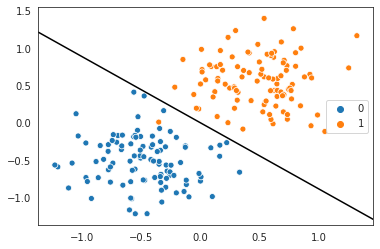

In [19]:
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

slope = -(ws[-1][0] / ws[-1][1])
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = slope * x_vals
plt.plot(x_vals, y_vals, c="k");

<h1>Stochastic Gradient Descent</h>

Code for generating random subsets from the original dataset.

In [0]:
import random
def get_subsets(train_ratio,x):
  nsamples = int(np.round(len(x)*train_ratio))
  ind = random.sample(range(len(x)),nsamples)
  ind = list(np.sort(ind))

  x_sub_train = []
  x_sub_test = []
  y_sub_train = []
  y_sub_test = []
  for i in range(len(ind)):
    l = x[i]
    y_samp = l[-1]
    x_samp = l[:2]
    x_sub_train.append(x_samp)
    y_sub_train.append(y_samp)

  ind_test = []
  for i in range(len(x)):
    if i not in ind:
      ind_test.append(i)

  ind_test = list(np.sort(ind_test))
  for i in range(len(ind)):
    l = x[i]
    y_samp = l[-1]
    x_samp = l[:2]
    x_sub_test.append(x_samp)
    y_sub_test.append(y_samp) 

  x_sub_train = np.asarray(x_sub_train)
  x_sub_test = np.asarray(x_sub_test)
  y_sub_train = np.asarray(y_sub_train)
  y_sub_test = np.asarray(y_sub_test) 

  return x_sub_train, y_sub_train, x_sub_test, y_sub_test

In [0]:
count = 0
folds = 1400
r2 = 0
t0 = time.time()
timer = []
all_losses_SDG = []
w0 = np.random.normal(0,1,2)
while(count <= folds):
  t_iter = time.time()

  X, y, x_test, y_test  = get_subsets(0.2,X_full)
  ws_sgd = gradient_descent(w0,[0.01]*1,Loss_gradient)
  y_pred = predict(x_test, ws_sgd[-1])
  rss = np.mean((y_pred-y_test)**2)/(np.std(y_test)**2)
  r2 = 1 - rss
  count+=1
  w0 = ws_sgd[-1]

  run_time = time.time() - t_iter
  timer.append(run_time)

  loss = Loss_function(x_test,y_test,ws_sgd[-1])
  all_losses_SDG.append(loss)

run_time = time.time() - t0

In [22]:
print(f'R-squared value using SGD = {r2}')
print(f'Total running time for SGD = {run_time}')
print(f'Average running time per iteration = {np.mean(timer)}')
print(f'Loss achieved at the end of SGD = {all_losses_SDG[-1]}')

R-squared value using SGD = 1.0
Total running time for SGD = 2.1669249534606934
Average running time per iteration = 0.0015158466064104602
Loss achieved at the end of SGD = 0.046255838445139565


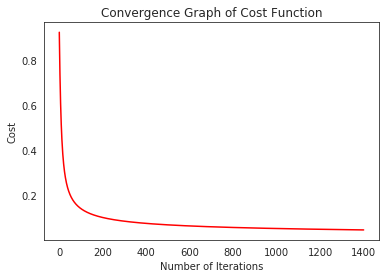

In [23]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(all_losses_SDG)), all_losses_SDG, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

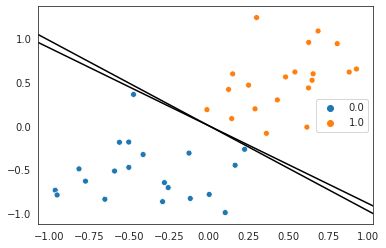

In [24]:
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

slope = -(ws_sgd[-1][0] / ws_sgd[-1][1])
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = slope * x_vals
plt.plot(x_vals, y_vals, c="k");

slope = -(ws[-1][0] / ws[-1][1])
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = slope * x_vals
plt.plot(x_vals, y_vals, c="k");

From the above results we can see that the gradient descent and Stochastic gradient descent give equally good results. The classifier generated in both the cases is of almost the same quality. 

From the run times displayed in this experiment we can see that, running time for SGD is greater than GD. Here both of these algorithms are made to run till they give a similar value for 'loss' and 'R-squared'. And to achive this SGD took more time than GD. From the above results we can see that SGD achieves the same result as that of GD but with a slower rate of convergence. But SGD is faster per iteration. 